In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as I

# Time evolution of the density matrix during the pump

We analyze the time evolution of both $\rho_{cvk}$ and $\rho_{cc'k}$ when the  pump is active.

To perform this analysis we consider a sinusoidal pump $Esin(\omega_0 t)$ activated at $t=0$.

## Analysis of $\rho_{cvk}$ at one-photon level

We study the DM in the valence-conduction sector at the leading order in the pump.

The EQM at one photon level reads
$$
\partial_{t}\rho_{cvk} + i\Omega_{cvk}\rho_{cvk} = F^0_{cvk}(t)
$$
where
$$
F^0_{cvk}(t) = id_{cvk}E sin(\omega_0t) = iA_{cvk}sin(\omega_0t)
$$
Here $\Omega_{cvk} = \Delta\epsilon_{cvk} - i\eta_{cv}$ and we parametrize the energy difference
between valence and conduction states as 
$$
\Delta\epsilon_{cvk} = \omega_0+\delta_{cvk}
$$
The EQM admits the solution (with initial condition $\rho_{cvk}(0) = 0$) of the form
$$
\rho_l(t) = iA_le^{-i\Omega_lt}\int_0^t dt'
e^{i\Omega_lt'}sin(\omega_0t')
$$
where $l=\{ckv\}$ is a compact multi index notation.

The integral can be computed both analtycal and with numerical integration, we perform both the analysis.

### Analytical solution

The integrand can be recasted as
$$
\frac{1}{2i}\left(
e^{i(2\omega_0+\delta_l)t'}-e^{i\delta_lt'}
\right)e^{\eta_{cv}t'}
$$
The first addend is a _fast oscillating term_ and its contribution should be small after the time integral so we 
neglect it. The integral of the second one provides
$$
-\frac{1}{2i}\frac{1}{i\delta_l+\eta_cv}\left(
e^{(i\delta_l+\eta_{cv})t} -1
\right)
$$
So the solution for the DM reads
$$
\rho_l(t) = -\frac{A_l}{2}\frac{1}{i\delta_l+\eta_{cv}}
\left(e^{-i\omega_0 t} -e^{-i\Omega_lt}
\right)
$$
In the long time regime the second addend is suppressed by the damping $\eta_{cv}$ so the $\rho_l$ shows
an undumped oscillatory behavior with the frequency of the pump.

In [54]:
from mppi import Utilities as U

eta_ev = 0.004 # damping parameter in eV
e0 = 1.5 # pump energy in eV
delta = 0. # detuning of the cv transition 
A = 1 # field intensity times the transition dipole

# we convert these parameters in fs
hcut = U.Planck_ev_ps*1e3/(2*np.pi) # reduced Planck ev * fs

eta = eta_ev/hcut
omega0 = e0/hcut
print(eta,omega0/(2*np.pi))

0.006077069792872049 0.36269838639376023


In [55]:
sim_time = 2000 # in fs,
time = np.arange(0.,sim_time,0.2)

In [56]:
def rhocv(t,omega0,A=1,delta=0,eta=0):
    f1 = - A/2*1/(1j*delta+eta)
    f2 = np.exp(-1j*omega0*t) - np.exp(-1j*(omega0+delta)*t)*np.exp(-eta*t)
    res = f1*f2
    return np.real(res),np.imag(res)

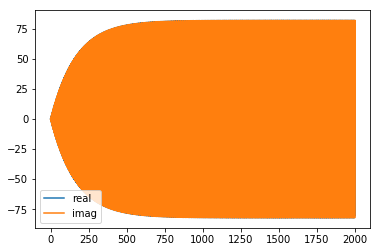

In [57]:
rho_val = rhocv(time,omega0,eta=eta,delta=delta)
plt.plot(time,rho_val[0],label='real')
plt.plot(time,rho_val[1],label='imag')
plt.legend()

### Numerical solution

In [58]:
def integrand(t,omega0,delta=0,eta=0):
    re = np.exp(eta*t)*np.cos((omega0+delta)*t)*np.sin(omega0*t)
    im = np.exp(eta*t)*np.sin((omega0+delta)*t)*np.sin(omega0*t)
    return re,im

def integral(time,omega0,delta=0,eta=0):
    re_inte = [0.]
    im_inte = [0.]
    for ind in range(1,len(time)):
        re_inte.append(I.simps(y=integrand(time[0:ind],omega0,delta=delta,eta=eta)[0],x=time[0:ind]))
        im_inte.append(I.simps(y=integrand(time[0:ind],omega0,delta=delta,eta=eta)[1],x=time[0:ind]))
    inte = np.array(re_inte)+1j*np.array(im_inte)
    return inte

def rhocv_numerical(time,omega0,A=1,delta=0,eta=0):
    inte = integral(time,omega0,delta=delta,eta=eta)
    prefactor = 1j*A*np.exp((-1j*(omega0+delta)-eta)*time)
    res = prefactor*inte
    return np.real(res),np.imag(res)

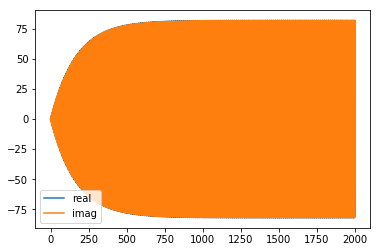

In [59]:
rhoval_num = rhocv_numerical(time,omega0,eta=eta,delta=delta)
plt.plot(time,rhoval_num[0],label='real')
plt.plot(time,rhoval_num[1],label='imag')
plt.legend()

## Analysis of $\rho_{cc'k}$ at two-photon level

We analyze the equation of the $\rho_{cc'k}$ components at the second order in the pulse intensity. 

In particular we want to check if the source term can produce terms that couples
to the natural frequency $\Delta\epsilon_{cc'k}$ of these modes.

The EQM for $\rho_{cc'k}$ can be rewritten as
$$
\partial_{t}\rho_{cc'k} + i\Omega_{cc'k}\rho_{cc'k} = F^1_{cc'k}(t)
$$
where $\Omega_{cc'k} = \Delta\epsilon_{cc'k} - i\eta_{cc'}$ and the source term is given by
$$
F^1_{cc'k}(t) = -i\mathbf{E}(t)\cdot \sum_{v}(\mathbf{d}_{cvk}\rho^{(1)}_{vc'k}(t)
-\mathbf{d}_{vc'k}\rho^{(1)}_{cvk}(t))
$$

We further analyze the structure of the source by considering only one valence band and the 
sinusoidal pump, so that
$$
F^1_{cc'k}(t) = -i sin(\omega_0t)\left(A_{cvk}\rho^{(1)}_{vc'k}(t)
-A_{vc'k}\rho^{(1)}_{cvk}(t)\right)
$$